## Imports

In [1]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy . linalg as lng # linear algebra from scipy library
from scipy . spatial import distance # load distance function
from sklearn import preprocessing as preproc # load preprocessing function

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [2]:
diabetPath = './DiabetesDataNormalized.txt'
T = np.loadtxt(diabetPath, delimiter = ' ', skiprows = 1)
y = T[:, 10]
X = T[:,:10]

# Get number of observations (n) and number of independent variables (p)
[n, p] = np.shape(X)

M = X

## 1 Solve the Ordinary Least Squares (OLS) computationally (for the diabetes data set):

> (a) What is the difference between using a brute force implementation(analytical) for an OLS solver and a numerically ’smarter’ implementation? Compute the ordinary least squares solution to the diabetes data set for both options and look at the relative difference. Use for example lng.lstsq to invert the matrix or to solve the linear system of equation.

In [3]:
def ols_numerical(X, y):
    # Call lstsq from lng to get betas
    return lng.lstsq(X, y)

def ols_analytical(X, y):
    # Implement the analytical closed form way of calculating the betas 
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [4]:
# numerical solution
beta_num, _, _, _ = ols_numerical(M, y)
print(f'The list of betas: \n{beta_num}')

The list of betas: 
[-0.00618293 -0.14813008  0.32110005  0.20036692 -0.48931352  0.29447365
  0.06241272  0.10936897  0.46404908  0.04177187]


In [5]:
# analytical solution
beta_ana = ols_analytical(M,y)
print(f'The list of betas: \n{beta_ana}')

The list of betas: 
[-0.00618293 -0.14813008  0.32110005  0.20036692 -0.48931352  0.29447365
  0.06241272  0.10936897  0.46404908  0.04177187]


In [6]:
# difference in solutions
norm = np.linalg.norm(beta_ana-beta_num)
print(f'The norm of the difference between betas: \n{norm}')

The norm of the difference between betas: 
2.1112011768850182e-14


Is the difference significant? 

What can we conclude relating to numerical vs analytical solutions?

> (b) How could you include an intercept term in Python? This means using the model: $y = β_0 +xβ_1 +...+x_pβ_p +ε $ rather than: $ y=x_1β_1 +...+x_pβ_p +ε. $

In [7]:
# Include offset / intercept
M = np.hstack((np.ones((M.shape[0], 1)), M))

What is the value of the intercept coefficient?

Can you explain why?

In [11]:
beta_ana = ols_analytical(M,y)
print(beta_ana)

[-6.80770544e-16 -6.18292545e-03 -1.48130075e-01  3.21100050e-01
  2.00366920e-01 -4.89313521e-01  2.94473646e-01  6.24127211e-02
  1.09368973e-01  4.64049083e-01  4.17718663e-02]


> (c) Calculate the mean squared error $MSE = 1/n \sum^n_{i=1} (y_i−x_iβ)^2$.

In [12]:
# Calculate the estimated y values and use these to calculate the MSE.
def compute_mse(X,beta):
    return 1/X.shape[0] * np.sum((y - X @ beta)**2)

In [13]:
#mse_ana, res_ana, yhat_ana = compute_mse(M,beta_ana)

mse_ana = compute_mse(M,beta_ana)

print(f'mse from the analytical solution: {mse_ana}')

mse from the analytical solution: 0.48116051086159695


What happens to the MSE if we change some of the betas?

Is that what you expected?

In [14]:
beta_new = beta_ana
beta_new[5] = 0

#mse_new, res_new, yhat_new = compute_mse(M,beta_new)

mse_new = compute_mse(M,beta_new)

print(f'mse from the changed betas: {mse_new}')

mse from the changed betas: 0.7200465405399545


> (d) Calculate the residual sum of squares $RSS = ∥{\bf y} − Xβ∥_2^2$ and the total sum of squares $T SS = ∥{\bf y} − y ̄∥_2^2$, where $y ̄$ is the estimated mean of ${\bf y}$. Report on the $R^2$ measure, that is, the proportion of variance in the sample set explained by the
  model: $R^2 = 1 − \frac{RSS}{TSS}$


In [18]:
beta_ana

array([-6.80770544e-16, -6.18292545e-03, -1.48130075e-01,  3.21100050e-01,
        2.00366920e-01,  0.00000000e+00,  2.94473646e-01,  6.24127211e-02,
        1.09368973e-01,  4.64049083e-01,  4.17718663e-02])

In [16]:
def RSS(M, y, beta):
    return np.sum((y - M @ beta)**2)

def TSS(y):
    return np.sum((y - np.mean(y))**2)

def R2(M, y, beta):
    return 1 - RSS(M, y, beta) / TSS(y)

print(R2(M, y, beta_ana))
print(TSS(y))
print(RSS(M, y, beta_ana))

0.2783207008647174
441.00000000000034
318.2605709186599


How much variance in <strong>y</strong> can we explain using this simple model?

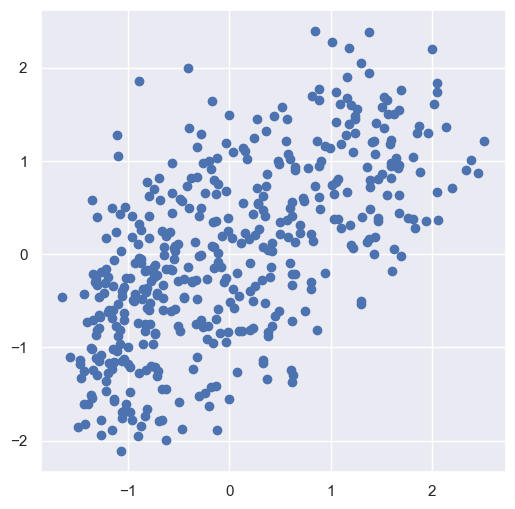

In [17]:
plt.figure(figsize=(6, 6))
plt.scatter(y, M @ beta_ana)

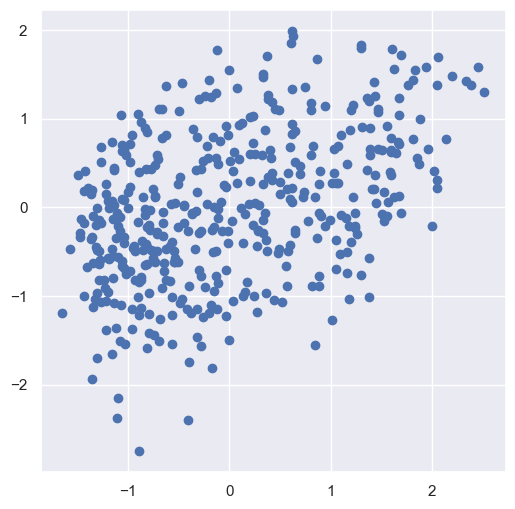

In [ ]:
# plot residuals
plt.figure(figsize=(6, 6))
plt.scatter(y, y - M @ beta_ana)